In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

plt.style.use('dark_background')

### IMPORT YF ###
#!pip install yfinance
import yfinance as yf

# Pull data for one stock ticker from Yahoo Finance

In [42]:
ticker = "MSTR"

start_date = "2000-01-01"
df = yf.download(ticker, start=start_date)
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,MSTR,MSTR,MSTR,MSTR,MSTR
Date,,,,,
2000-01-03,104.250000,115.500000,97.906250,115.500000,535800
2000-01-04,98.000000,114.125000,97.875000,104.875000,874600
2000-01-05,104.250000,105.875000,89.781250,99.500000,613800
2000-01-06,100.125000,108.062500,99.500000,107.500000,456600
2000-01-07,105.187500,108.500000,98.625000,102.468750,563000
...,...,...,...,...,...
2025-05-15,397.029999,415.359985,394.140015,411.700012,14674700
2025-05-16,399.799988,406.899994,389.010010,399.000000,12461100


## Deal with multi-index columns

In [43]:
df.columns

MultiIndex([( 'Close', 'MSTR'),
            (  'High', 'MSTR'),
            (   'Low', 'MSTR'),
            (  'Open', 'MSTR'),
            ('Volume', 'MSTR')],
           names=['Price', 'Ticker'])

In [44]:
# method 1
#df.columns = df.columns.droplevel(1)

# method 2 (this one is better)
df = df.xs(ticker, axis=1, level=1)
df

Price,Close,High,Low,Open,Volume
Date,,,,,
2000-01-03,104.250000,115.500000,97.906250,115.500000,535800
2000-01-04,98.000000,114.125000,97.875000,104.875000,874600
2000-01-05,104.250000,105.875000,89.781250,99.500000,613800
2000-01-06,100.125000,108.062500,99.500000,107.500000,456600
2000-01-07,105.187500,108.500000,98.625000,102.468750,563000
...,...,...,...,...,...
2025-05-15,397.029999,415.359985,394.140015,411.700012,14674700
2025-05-16,399.799988,406.899994,389.010010,399.000000,12461100
2025-05-19,413.420013,414.589996,392.619995,392.809998,12822000


<Axes: xlabel='Date'>

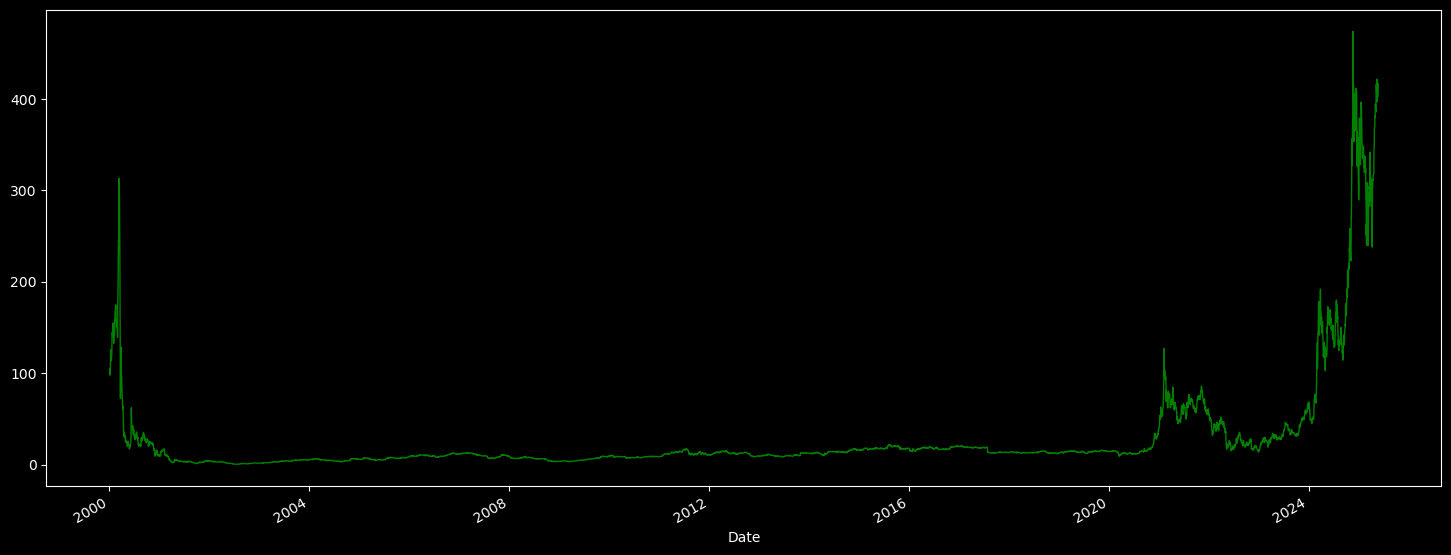

In [45]:
df.Close.plot(figsize=(18,7), linewidth=1, c='g')

## Get returns

<Axes: xlabel='Date'>

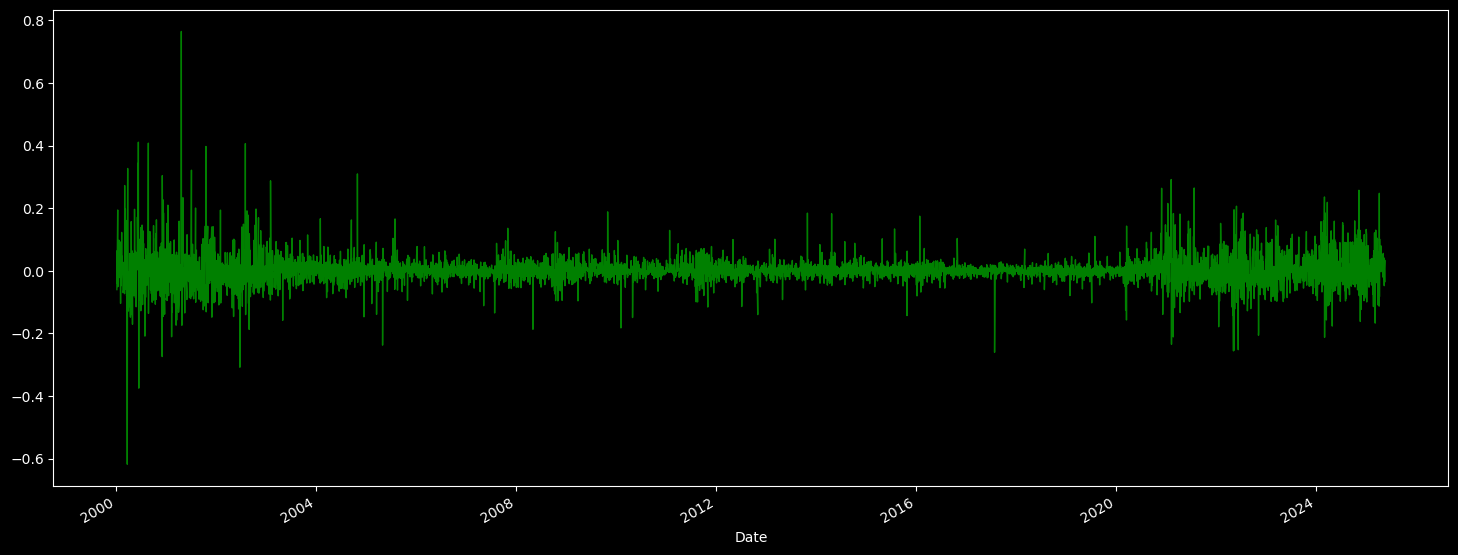

In [46]:
returns = df.Close.pct_change(periods=1).dropna()

returns.plot(figsize=(18,7), linewidth=1, c='g')
#returns.rolling(window=5*4*2).std().plot(c='r')

## Compute Bollinger Bands (mean price +- std price)

<Axes: xlabel='Date'>

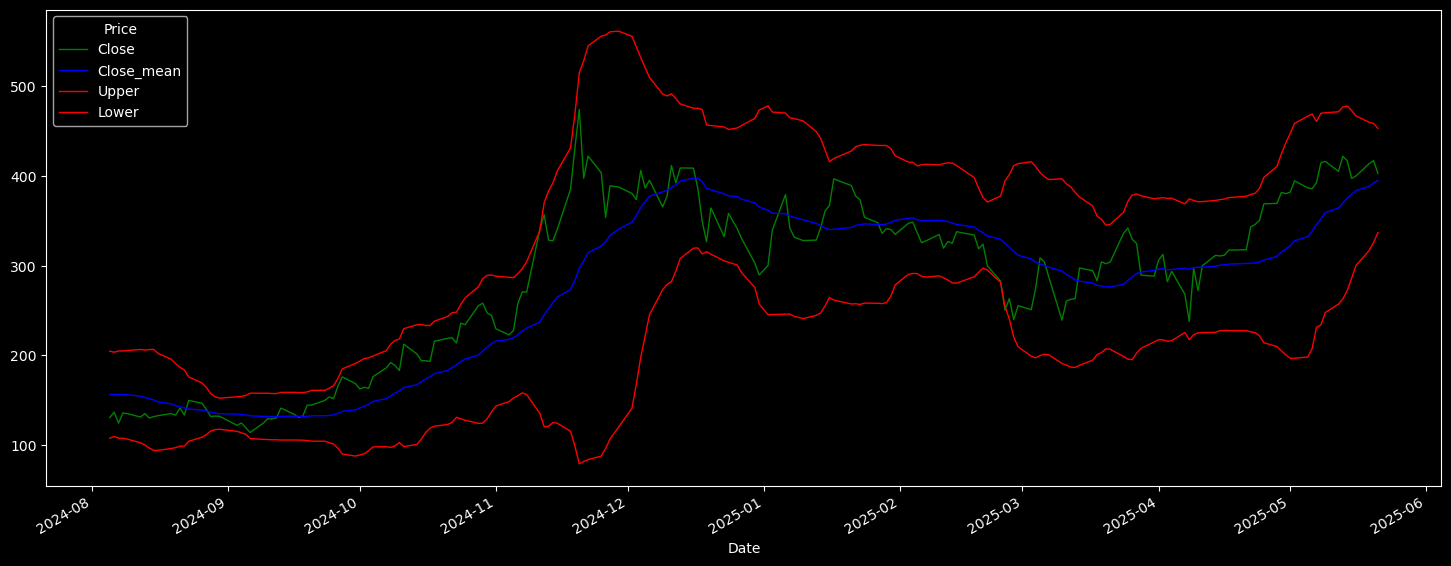

In [51]:
BB_window = 5*4

# Calculate moving average and standard deviation
df['Close_mean'] = df['Close'].rolling(window=BB_window).mean()
df['Close_std']  = df['Close'].rolling(window=BB_window).std()

# Calculate Bollinger Bands
num_std = 3
df['Upper'] = df['Close_mean'] + (num_std * df['Close_std'])
df['Lower'] = df['Close_mean'] - (num_std * df['Close_std'])

df[['Close','Close_mean','Upper','Lower']].iloc[-200:,:].plot(figsize=(18,7), linewidth=1, color=['g','b','r','r'])

# Pull data for multiple stock tickers from Yahoo Finance

In [52]:
tickers = ["MSTR", 'META', 'VOO', 'BND', 'DIS']

start_date = "2000-01-01"
df = yf.download(tickers, start=start_date)
df

[*********************100%***********************]  5 of 5 completed


Price           Close                                                  \
Ticker            BND         DIS        META        MSTR         VOO   
Date                                                                    
2000-01-03        NaN   22.833178         NaN  104.250000         NaN   
2000-01-04        NaN   24.170691         NaN   98.000000         NaN   
2000-01-05        NaN   25.173826         NaN  104.250000         NaN   
2000-01-06        NaN   24.170691         NaN  100.125000         NaN   
2000-01-07        NaN   23.788546         NaN  105.187500         NaN   
...               ...         ...         ...         ...         ...   
2025-05-15  72.430000  112.220001  643.880005  397.029999  542.760010   
2025-05-16  72.480003  113.419998  640.340027  399.799988  546.260010   
2025-05-19  72.459999  112.660004  640.429993  413.420013  546.820007   
2025-05-20  72.330002  112.360001  637.099976  416.920013  544.880005   
2025-05-21  71.879997  110.459999  635.500000  402.690002  535.770020   

Price            High                                                  \
Ticker            BND         DIS        META        MSTR         VOO   
Date                                                                    
2000-01-03        NaN   22.880946         NaN  115.500000         NaN   
2000-01-04        NaN   24.361764         NaN  114.125000         NaN   
2000-01-05        NaN   25.317132         NaN  105.875000         NaN   
2000-01-06        NaN   25.317128         NaN  108.062500         NaN   
2000-01-07        NaN   24.552836         NaN  108.500000         NaN   
...               ...         ...         ...         ...         ...   
2025-05-15  72.449997  112.849998  657.309998  415.359985  543.250000   
2025-05-16  72.680000  113.440002  640.440002  406.899994  546.469971   
2025-05-19  72.480003  112.989998  643.000000  414.589996  547.450012   
2025-05-20  72.389999  113.400002  639.349976  417.850006  546.059998   
2025-05-21  72.199997  112.485001  646.609985  423.339996  544.690491   

Price             Low                                                  \
Ticker            BND         DIS        META        MSTR         VOO   
Date                                                                    
2000-01-03        NaN   21.973351         NaN   97.906250         NaN   
2000-01-04        NaN   22.928717         NaN   97.875000         NaN   
2000-01-05        NaN   24.170695         NaN   89.781250         NaN   
2000-01-06        NaN   24.170691         NaN   99.500000         NaN   
2000-01-07        NaN   23.549704         NaN   98.625000         NaN   
...               ...         ...         ...         ...         ...   
2025-05-15  72.169998  111.580002  638.580017  394.140015  537.840027   
2025-05-16  72.449997  111.419998  626.150024  389.010010  541.700012   
2025-05-19  72.059998  111.900002  627.799988  392.619995  540.580017   
2025-05-20  72.199997  111.809998  632.260010  406.100006  541.989990   
2025-05-21  71.804802  110.129997  630.169983  395.528503  534.840820   

Price            Open                                                  \
Ticker            BND         DIS        META        MSTR         VOO   
Date                                                                    
2000-01-03        NaN   22.355496         NaN  115.500000         NaN   
2000-01-04        NaN   22.928717         NaN  104.875000         NaN   
2000-01-05        NaN   24.170695         NaN   99.500000         NaN   
2000-01-06        NaN   25.173822         NaN  107.500000         NaN   
2000-01-07        NaN   24.170691         NaN  102.468750         NaN   
...               ...         ...         ...         ...         ...   
2025-05-15  72.250000  112.230003  654.280029  411.700012  538.260010   
2025-05-16  72.620003  111.919998  637.960022  399.000000  543.469971   
2025-05-19  72.169998  112.120003  628.250000  392.809998  540.630005   
2025-05-20  72.300003  112.440002  636.010010  413.5000

## Deal with multi-index columns

In [53]:
df.columns

MultiIndex([( 'Close',  'BND'),
            ( 'Close',  'DIS'),
            ( 'Close', 'META'),
            ( 'Close', 'MSTR'),
            ( 'Close',  'VOO'),
            (  'High',  'BND'),
            (  'High',  'DIS'),
            (  'High', 'META'),
            (  'High', 'MSTR'),
            (  'High',  'VOO'),
            (   'Low',  'BND'),
            (   'Low',  'DIS'),
            (   'Low', 'META'),
            (   'Low', 'MSTR'),
            (   'Low',  'VOO'),
            (  'Open',  'BND'),
            (  'Open',  'DIS'),
            (  'Open', 'META'),
            (  'Open', 'MSTR'),
            (  'Open',  'VOO'),
            ('Volume',  'BND'),
            ('Volume',  'DIS'),
            ('Volume', 'META'),
            ('Volume', 'MSTR'),
            ('Volume',  'VOO')],
           names=['Price', 'Ticker'])

## Get only closing price of all tickers

In [54]:
df = df.xs('Close', axis=1, level=0)
df

Ticker,BND,DIS,META,MSTR,VOO
Date,,,,,
2000-01-03,NaN,22.833178,NaN,104.250000,NaN
2000-01-04,NaN,24.170691,NaN,98.000000,NaN
2000-01-05,NaN,25.173826,NaN,104.250000,NaN
2000-01-06,NaN,24.170691,NaN,100.125000,NaN
2000-01-07,NaN,23.788546,NaN,105.187500,NaN
...,...,...,...,...,...
2025-05-15,72.430000,112.220001,643.880005,397.029999,542.760010
2025-05-16,72.480003,113.419998,640.340027,399.799988,546.260010
2025-05-19,72.459999,112.660004,640.429993,413.420013,546.820007


<Axes: xlabel='Date'>

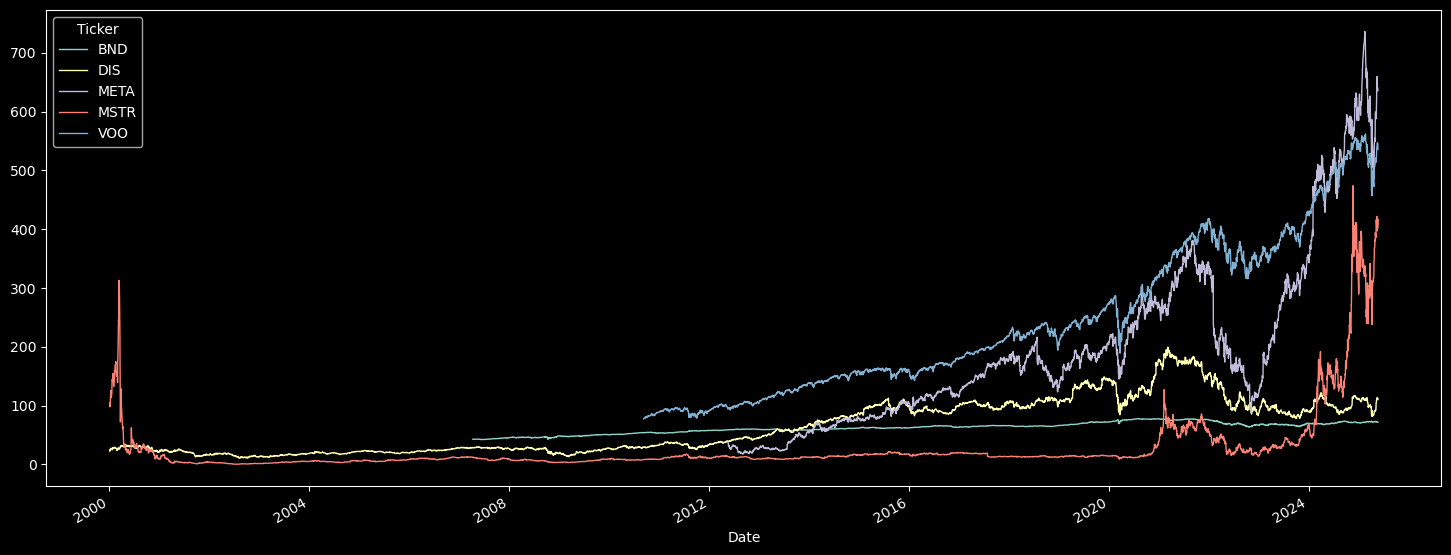

In [55]:
df.plot(figsize=(18,7), linewidth=1)

## Drop rows until all stocks are listed

In [56]:
df = df.dropna()
df

Ticker,BND,DIS,META,MSTR,VOO
Date,,,,,
2012-05-18,58.917988,38.746357,38.050663,12.905000,94.016571
2012-05-21,58.925034,39.259308,33.870361,13.169000,95.600418
2012-05-22,58.826893,39.259308,30.854584,13.039000,95.806282
2012-05-23,58.868973,39.100117,31.849892,13.081000,95.806282
2012-05-24,58.805870,39.303532,32.875057,12.694000,95.980507
...,...,...,...,...,...
2025-05-15,72.430000,112.220001,643.880005,397.029999,542.760010
2025-05-16,72.480003,113.419998,640.340027,399.799988,546.260010
2025-05-19,72.459999,112.660004,640.429993,413.420013,546.820007


<Axes: xlabel='Date'>

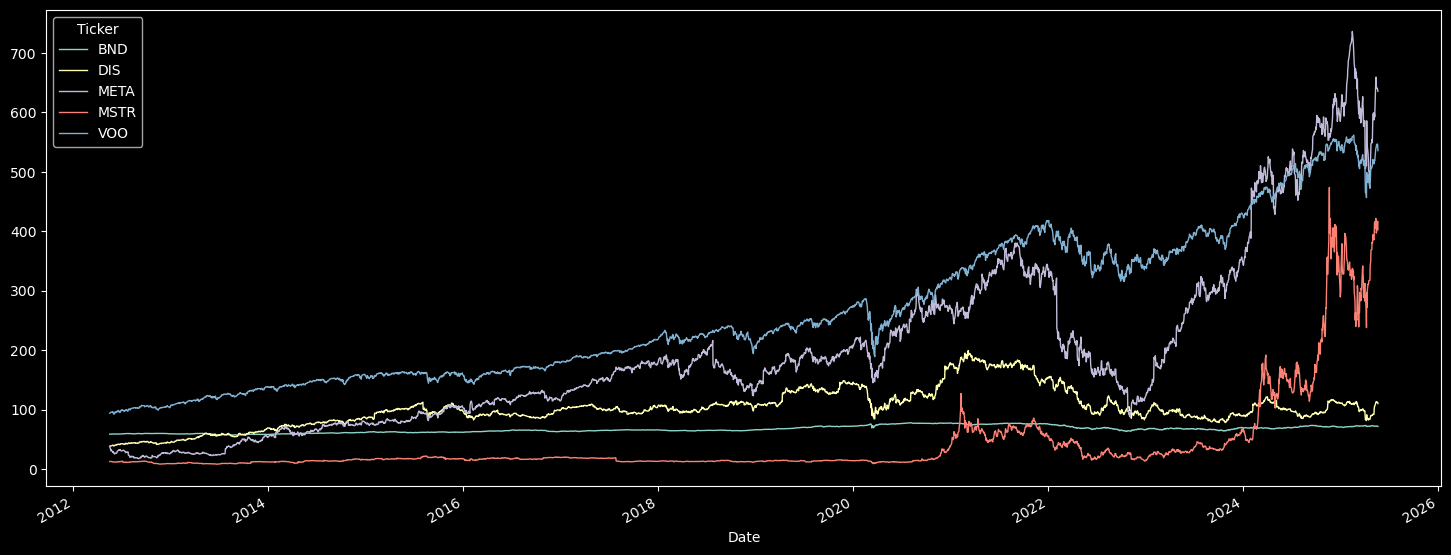

In [57]:
df.plot(figsize=(18,7), linewidth=1)

## Divide each ticker by starting price so you can see how $1 would grow

In [60]:
df.div(df.iloc[0,:], axis=1)

Ticker,BND,DIS,META,MSTR,VOO
Date,,,,,
2012-05-18,1.000000,1.000000,1.000000,1.000000,1.000000
2012-05-21,1.000120,1.013239,0.890139,1.020457,1.016846
2012-05-22,0.998454,1.013239,0.810882,1.010384,1.019036
2012-05-23,0.999168,1.009130,0.837039,1.013638,1.019036
2012-05-24,0.998097,1.014380,0.863981,0.983650,1.020889
...,...,...,...,...,...
2025-05-15,1.229336,2.896272,16.921650,30.765595,5.773025
2025-05-16,1.230185,2.927243,16.828617,30.980240,5.810252
2025-05-19,1.229845,2.907628,16.830981,32.035647,5.816209


<Axes: xlabel='Date'>

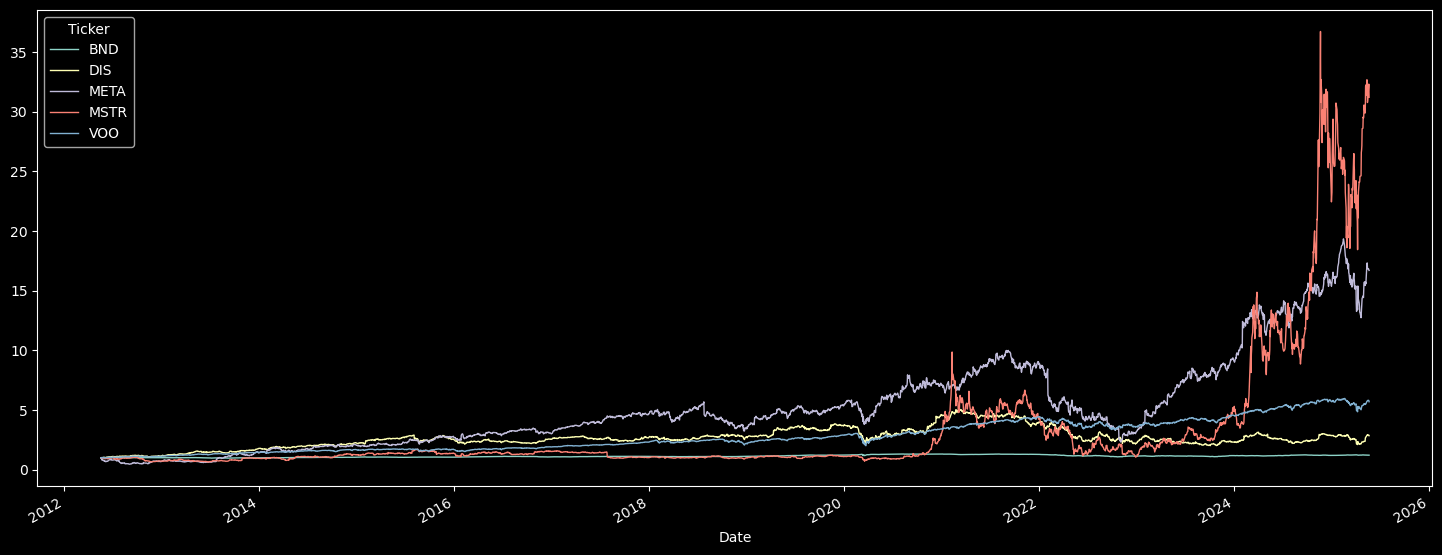

In [61]:
df.div(df.iloc[0,:], axis=1).plot(figsize=(18,7), linewidth=1)

## Get Sharpe ratio (mean return / std return)

In [67]:
periods = 252

returns = df.pct_change(periods=periods).dropna()
returns.head()

Ticker,BND,DIS,META,MSTR,VOO
Date,,,,,
2013-05-22,0.009237,0.519674,-0.341878,-0.298179,0.309640
2013-05-23,0.008995,0.492041,-0.263591,-0.306781,0.283369
2013-05-24,0.010800,0.497988,-0.215807,-0.291280,0.278921
2013-05-28,0.004479,0.531647,-0.246875,-0.294091,0.288048
2013-05-29,0.006410,0.513895,-0.293975,-0.279502,0.275925


In [69]:
returns_mean = returns.mean()
returns_mean

Ticker
BND     0.016829
DIS     0.098313
META    0.400457
MSTR    0.736969
VOO     0.149159
dtype: float64

In [70]:
returns_std = returns.std()
returns_std

Ticker
BND     0.052893
DIS     0.259659
META    0.533700
MSTR    1.594793
VOO     0.132600
dtype: float64

In [71]:
sharpe = returns_mean / returns_std
sharpe.sort_values(ascending=False)

Ticker
VOO     1.124887
META    0.750340
MSTR    0.462110
DIS     0.378622
BND     0.318176
dtype: float64